In [2]:
import numpy as np
# from qutip import *
from scipy.sparse import diags
import scipy.linalg as la
import math as math
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
from matplotlib import ticker
import matplotlib.patches as mpatches
st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,9)})

# np.set_printoptions(threshold=np.inf)
   
#sns.set(color_codes = True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


from numpy import ndarray

class myarray(ndarray):    
    @property
    def H(self):
        return self.conj().T

### Writing the Hamiltonian in Matrix Form

True
-0.8391294879740856


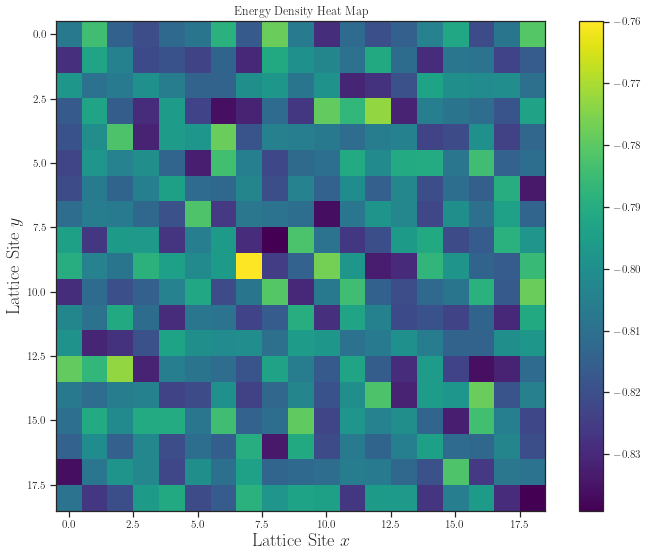

(20, 20)


<ipython-input-115-b155ca136e95>:205: ComplexWarning: Casting complex values to real discards the imaginary part
  E_density_cycles[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4


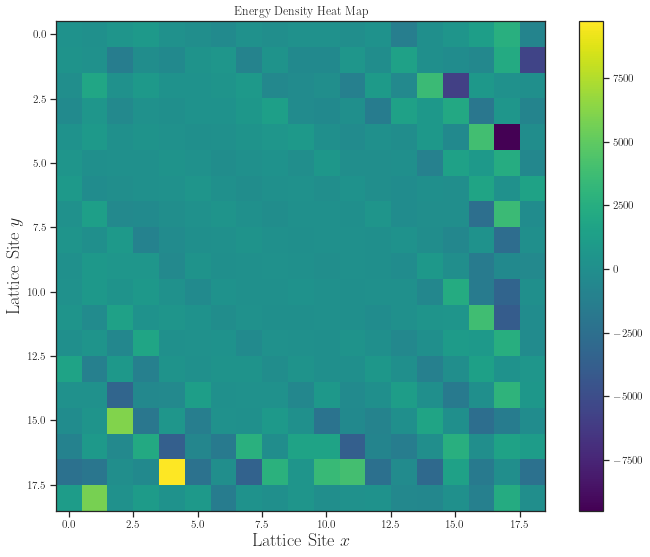

In [115]:
# System Size
L = 20

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

cycles=10

T_0 = -0.05
T_1 = 0.05

# T_0 = 0.95
# T_1 = 0.05

T_0 = T_0 * L
T_1 = T_1 * L

def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

# Create Basis states
basis = [(x, y) for x in range(1, L+1) for y in range(1, L+1)]

t_1 = 1
t_2 = 1

H_0 = np.zeros((L**2,L**2))
H_1 = np.zeros((L**2,L**2))



for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if i == L+1:
                        i = 1
                if k == m and l+1 == n:
                    i = basis.index((k, l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_2
                if k+1 == m and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_1 
                # Symmetric Transposed Matrixelements
                if k == m and l+1 == n:
                    j = basis.index((k, l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_2
                if k+1 == m and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_1
                # Periodic Boundary Conditions
                if l == L and n == 1 and k == m:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_2
                if k == L and m == 1 and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_1
                if l == L and n == 1 and k == m:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_2
                if k == L and m == 1 and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_1

                    
for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if i == L+1:
                        i = 1
                if k == m and l+1 == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_2*F(m,l+0.5)
                if k+1 == m and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_1*F(k+0.5,n)
                # Symmetric Transposed Matrixelements
                if k == m and l+1 == n:
                    j = basis.index((k, l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_2*F(k,l+0.5)
                if k+1 == m and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_1*F(k+0.5,n)
                # Periodic Boundary Conditions
                if l == L and n == 1 and k == m:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_2*F(m, n+0.5)
                if k == L and m == 1 and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_1*F(m+0.5, n)
                if l == L and n == 1 and k == m:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_2*F(m, n+0.5)
                if k == L and m == 1 and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_1*F(m+0.5, n)

# print(H_1)

print(check_symmetric(H_1))
                    

eigvals0, eigvecs0 = np.linalg.eigh(H_0)
idx0 = eigvals0.argsort()[::1]   
eigenValues0 = eigvals0[idx0]
U = eigvecs0[:,idx0]

eigvals1, eigvecs1 = la.eig(H_1)
idx1 = eigvals1.argsort()[::1]   
eigenValues1 = eigvals1[idx1]
V = eigvecs1[:,idx1] 

U = np.matrix(U)
V = np.matrix(V)

exponential_E0 = np.exp(-1j*T_0*eigenValues0)
exponential_E1 = np.exp(-1j*T_1*eigenValues1)
exponential_E0 = np.real(np.matrix(np.diag(exponential_E0)))
exponential_E1 = np.real(np.matrix(np.diag(exponential_E1)))

# diagonal = (U.H@H_0@U).round()
#print(diagonal)

W = V.H@U
mathcalW = U
W1_T1 = exponential_E1@W
W0_T0 = exponential_E0@(W.H)
W_total = W0_T0@W1_T1

E_density = np.zeros((L, L))
state = U[:,:int(L**2/2)]@((U.H)[:int(L**2/2),:])

for j in range(1, L):
    for i in range(1, L):
            if i == L:
                term1 = state[basis.index((i,j)),basis.index((1,j))]
                term2 = state[basis.index((1,j)), basis.index((i,j))]
            if j == L:
                term3 = state[basis.index((i,j)),basis.index((i,1))]
                term4 = state[basis.index((i,1)),basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            
            E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density = np.real(E_density)

print(E_density[L-1,L-1])
    
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr[1:L+1, 1:L+1], cmap='viridis', interpolation = 'nearest')
#     plt.imshow(arr, cmap='winter', interpolation = 'nearest')
#     plt.imshow(arr, cmap= 'magma', interpolation = 'nearest')
    plt.colorbar()
    plt.title( "Energy Density Heat Map" )
#     plt.xlim(1, L-1)
#     plt.ylim(1, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = 18)
    plt.ylabel(r'Lattice Site $y$',fontsize = 18)
    plt.show()
    
heatmap2d(E_density)
print(E_density.shape)


E_density_cycles = np.zeros((L, L))

for i in range(cycles - 1):
        mathcalW = mathcalW@W_total
        state = mathcalW[:,:int(L/2)]@((mathcalW.H)[:int(L/2),:])
for j in range(1, L):
    for i in range(1, L):
            if i == L:
                term1 = state[basis.index((i,j)),basis.index((1,j))]
                term2 = state[basis.index((1,j)), basis.index((i,j))]
            if j == L:
                term3 = state[basis.index((i,j)),basis.index((i,1))]
                term4 = state[basis.index((i,1)),basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            E_density_cycles[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density_cycles = np.real(E_density_cycles) - E_density

heatmap2d(E_density_cycles)
plt.show()


My Hamiltonian
[[ 0 -1  0 ...  0  0  0]
 [-1  0 -1 ...  0  0  0]
 [ 0 -1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ... -1  0 -1]
 [ 0  0  0 ...  0 -1  0]]
Your Hamiltonian
[[ 0. -1.  0. ...  0.  0.  0.]
 [-1.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0. -1.]
 [ 0.  0.  0. ...  0. -1.  0.]]
Comparison
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
My Hamiltonian
[[ 0.00000000e+00 -2.66726020e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.66726020e-03  0.00000000e+00 -7.16760724e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.16760724e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000

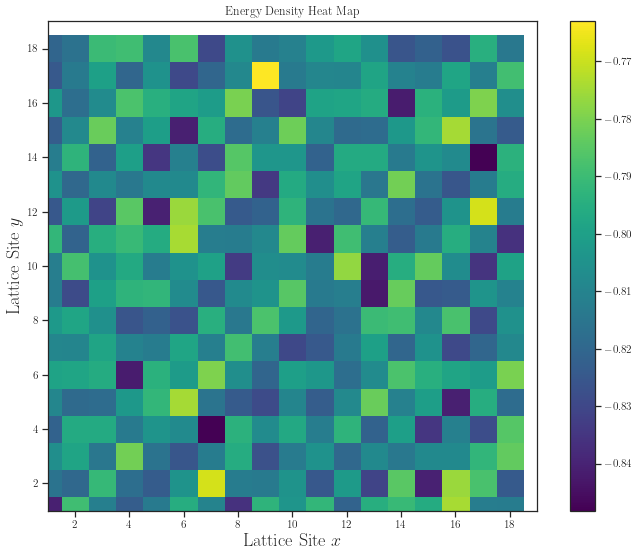

<ipython-input-3-9c4541bd7aa0>:248: ComplexWarning: Casting complex values to real discards the imaginary part
  E_density_cycles[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4


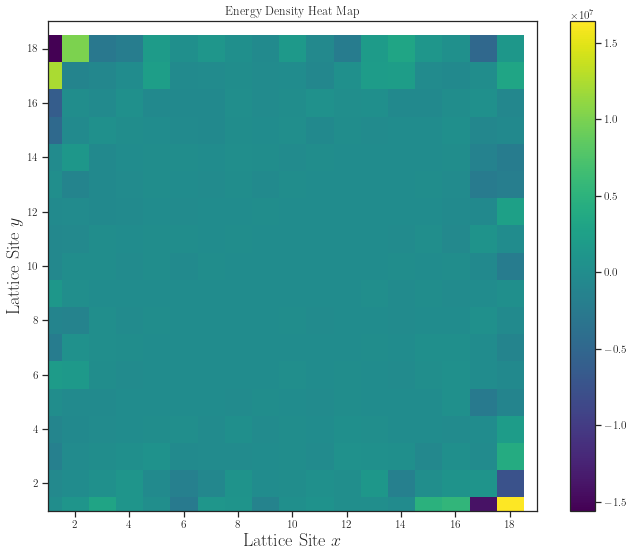

In [3]:
L = 20

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

cycles=12

T_0 = -0.05
T_1 = 0.05

# T_0 = 0.95
# T_1 = 0.05

T_0 = T_0 * L
T_1 = T_1 * L

def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham


def F(x):
    return 2*np.sin(np.pi*x/L)**2



def ssd(x, L):
    return np.sin(np.pi * (x + 0.5) / L) *  np.sin(np.pi * (x + 0.5) / L)

hamSSD = fermions2D(L, lambda i: ssd(i, L))
ham0 = fermions2D(L, lambda i: 1)


def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

# Create Basis states
basis = [(x, y) for x in range(1, L+1) for y in range(1, L+1)]

t_1 = -1
t_2 = -1

H_0 = np.zeros((L**2,L**2), dtype= int)
H_1 = np.zeros((L**2,L**2), dtype= float)



for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if i == L+1:
                        i = 1
                if k == m and l+1 == n:
                    i = basis.index((k, l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_2
                if k+1 == m and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_1 
                # Symmetric Transposed Matrixelements
                if k == m and l+1 == n:
                    j = basis.index((k, l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_2
                if k+1 == m and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_1
                # Periodic Boundary Conditions
                if l == L and n == 1 and k == m:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_2
                if k == L and m == 1 and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_0[i,j] = t_1
                if l == L and n == 1 and k == m:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_2
                if k == L and m == 1 and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_0[i,j] = t_1

                 
                
print("My Hamiltonian")
print(H_0)
print("Your Hamiltonian")
print(ham0)   
print("Comparison")

print(H_0 == ham0)

                
for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if i == L+1:
                        i = 1
                if k == m and l+1 == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_2*F(m,l+0.5)
                if k+1 == m and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_1*F(k+0.5,n)
                # Symmetric Transposed Matrixelements
                if k == m and l+1 == n:
                    j = basis.index((k, l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_2*F(k,l+0.5)
                if k+1 == m and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_1*F(k+0.5,n)
                # Periodic Boundary Conditions
                if l == L and n == 1 and k == m:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_2*F(m, n+0.5)
                if k == L and m == 1 and l == n:
                    i = basis.index((k,l))
                    j = basis.index((m,n))
                    H_1[i,j] = t_1*F(m+0.5, n)
                if l == L and n == 1 and k == m:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_2*F(m, n+0.5)
                if k == L and m == 1 and l == n:
                    j = basis.index((k,l))
                    i = basis.index((m,n))
                    H_1[i,j] = t_1*F(m+0.5, n)

                    
print("My Hamiltonian")
print(H_1)
print("Your Hamiltonian")
print(hamSSD)
print("Comparison")

print(H_1 == hamSSD)    



# eigvals0, U = np.linalg.eigh(ham0)
# eigvals1, V = np.linalg.eigh(hamSSD)


eigvals0, eigvecs0 = np.linalg.eigh(ham0)
idx0 = eigvals0.argsort()[::1]   
eigenValues0 = eigvals0[idx0]
U = eigvecs0[:,idx0]

eigvals1, eigvecs1 = la.eig(hamSSD)
idx1 = eigvals1.argsort()[::1]   
eigenValues1 = eigvals1[idx1]
V = eigvecs1[:,idx1] 

U = np.matrix(U)
V = np.matrix(V)

exponential_E0 = np.exp(-1j*T_0*eigvals0)
exponential_E1 = np.exp(-1j*T_1*eigvals1)
# exponential_E0 = np.real(np.matrix(np.diag(exponential_E0)))
# exponential_E1 = np.real(np.matrix(np.diag(exponential_E1)))

exponential_E0 = np.matrix(np.diag(exponential_E0))
exponential_E1 = np.matrix(np.diag(exponential_E1))

# diagonal = (U.H@H_0@U).round()
#print(diagonal)

W = V.H@U
mathcalW = U
W1_T1 = exponential_E1@W
W0_T0 = exponential_E0@(W.H)
W_total = W0_T0@W1_T1

E_density = np.zeros((L**2, L**2))
state = U[:,:int(L**2/2)]@((U.H)[:int(L**2/2),:])

for j in range(1, L):
    for i in range(1, L):
            if i == L:
                term1 = state[basis.index((i,j)),basis.index((1,j))]
                term2 = state[basis.index((1,j)), basis.index((i,j))]
            if j == L:
                term3 = state[basis.index((i,j)),basis.index((i,1))]
                term4 = state[basis.index((i,1)),basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density = np.real(E_density)
    
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr[1:L, 1:L], cmap='viridis', interpolation = 'nearest')
#     plt.imshow(arr, cmap='winter', interpolation = 'nearest')
#     plt.imshow(arr, cmap= 'magma', interpolation = 'nearest')
    plt.colorbar()
    plt.title( "Energy Density Heat Map" )
    plt.xlim(1, L-1)
    plt.ylim(1, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = 18)
    plt.ylabel(r'Lattice Site $y$',fontsize = 18)
    plt.show()
    
heatmap2d(E_density)
E_density_cycles = np.zeros((L**2, L**2))

for i in range(cycles - 1):
        mathcalW = mathcalW@W_total
        state = mathcalW[:,:int(L/2)]@((mathcalW.H)[:int(L/2),:])
for j in range(1, L):
    for i in range(1, L):
            if i == L:
                term1 = state[basis.index((i,j)),basis.index((1,j))]
                term2 = state[basis.index((1,j)), basis.index((i,j))]
            if j == L:
                term3 = state[basis.index((i,j)),basis.index((i,1))]
                term4 = state[basis.index((i,1)),basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            E_density_cycles[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density_cycles = np.real(E_density_cycles) - E_density

heatmap2d(E_density_cycles)
plt.show()



# print(H_1)

In [6]:
# print(E_density.round())      
# print(state.diagonal())

# E_density.append([1/2*(state[i,i+1]) + state[i+1, i]
#                       for i in range(L^2-1)])

# # E_density[i,j] = 

# x = [1/2*(state[i,i+1] + state[i+1, i]) for i in range(L-1)]
# y = [1/2*(state[i,i+1] + state[i+1, i]) for i in range(L-1)]
# # E_density.append([t_1*(state[i,j+1]) + t_2*state[i+1, j]] for i in range(L-1))
# E_density.append(x)
# print(E_density)

# fig1, ax1 = plt.subplots(figsize=(10,6))
# ax1.set_xticks(np.linspace(0,19,11))
# ax1.set_xticklabels(range(0,1001,100))

# ax1.set_yticks(np.linspace(0,19,11))





# print(len(E_density))
# print(E_density)


#         E_density.append([1/2*(state[i, i+1] + state[i+1, i]) 
#                               for i in range(L-1)])
# E_density = np.real(np.array(E_density))
# print(E_density.shape)

# j=1
# while j in range(cycles-1):
#     plt.plot(E_density[cycles - j] - E_density[0], label="{}-cycles".format(cycles-j))
#     j += 3

#     plt.plot(E_density[cycles-1] - E_density[0], label="A")
#     plt.plot(E_density[cycles-5] - E_density[0], label="B")

#     plt.plot(E_density[cycles-10] - E_density[0], label="C")

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(E_density, linewidth=0.5)
# plt.show()


# text = plt.gca().yaxis.get_offset_text()
# text.set_size(18)





# plt.savefig('Energy_Density1.pdf',bbox_inches='tight')



# E_density = []
#     state = U[:,:int(L/2)]@((U.H)[:int(L/2),:])
#     E_density.append([1/2*(state[i,i+1] + state[i+1, i])
#                       for i in range(L-1)])
#     for i in range(cycles - 1):
#         mathcalW = mathcalW@W_total
#         state = mathcalW[:,:int(L/2)]@((mathcalW.H)[:int(L/2),:])
#         E_density.append([1/2*(state[i, i+1] + state[i+1, i]) 
#                               for i in range(L-1)])
#     E_density = np.real(np.array(E_density))




In [7]:
def EnergyDensity(L,cycles,T_0, T_1, pbc):
    T_0 = T_0 * L
    T_1 = T_1 * L
    def F(x):
        return 2*np.sin(np.pi*x/L)**2